## Problem Statement

Buyers spend a significant amount of time surfing an e-commerce store, since the pandemic the e-commerce has seen a boom in the number of users across the domains. In the meantime, the store owners are also planning to attract customers using various algorithms to leverage customer behavior patterns

Tracking customer activity is also a great way of understanding customer behavior and figuring out what can actually be done to serve them better. Machine learning and AI has already played a significant role in designing various recommendation engines to lure customers by predicting their buying patterns

##### Objective: 
The objective of this is to build a regression algorithm to predict the time a buyer will spend on the platform.

##### Attribute Description:
- session_id - Unique identifier for every row
- session_number - Session type identifier
- client_agent - Client-side software details
- device_details -  Client-side device details
- date - Datestamp of the session
- purchased - Binary value for any purchase done
- added_in_cart - Binary value for cart activity
- checked_out -  Binary value for checking out successfully
- time_spent - Total time spent in seconds (Target Column)

In [177]:
# for analysis and data processing
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import datetime as dt
import re
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
# for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_log_error
import shap
import warnings
warnings.filterwarnings('ignore')

In [178]:
def read_data(path_to_csv_file, exclude_columns=None):
    '''
    Reads csv files from specified paths

    '''
    if exclude_columns:
        # Read CSV file with exclusion of specified columns
        df = pd.read_csv(path_to_csv_file)
        df = df.drop(columns=exclude_columns)
    else:
        # Read CSV file without exclusions
        df = pd.read_csv(path_to_csv_file)
    
    return df

# Call the function to import train data
train = read_data('/Users/mncedisimncwabe/Downloads/ParticipantData_BTPC/Train.csv')
# Call the function to import test data, excluding 'Sale Price' and 'Segment' columns
test = read_data('/Users/mncedisimncwabe/Downloads/ParticipantData_BTPC/test.csv')

In [179]:
def df_snapshot(df):
    '''
    Returns top 5 rows of the dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return display(df.head())

print(f'train:')
df_snapshot(train)
print(f'test:')
df_snapshot(test)

train:


,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


test:


,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [180]:
def data_types(df):
    '''
    Returns datatype of fields in a dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return df.info()

print(f'train:')
data_types(train)
print(f'test:')
data_types(test)

train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5429 non-null   object 
 1   session_number  5429 non-null   int64  
 2   client_agent    5269 non-null   object 
 3   device_details  5429 non-null   object 
 4   date            5429 non-null   object 
 5   purchased       5429 non-null   int64  
 6   added_in_cart   5429 non-null   int64  
 7   checked_out     5429 non-null   int64  
 8   time_spent      5429 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 381.9+ KB
test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   session_id      2327 non-null   object
 1   session_number  2327 non-null   int64 
 2   client_agent    2268 non-null   obj

In [181]:
def convert_dates_to_datetime(df, column):
    """
    Returns a dataframe with converted dates field from object to datetime.
    
    """
    # Convert the preprocessed date strings to datetime
    df[column] = pd.to_datetime(df[column], errors='coerce')

    # Extract day of the week, day of the month, and month
    df['Day_of_Week'] = df[column].dt.day_name()
    df['Day_of_Month'] = df[column].dt.day
    df['Month'] = df[column].dt.month_name()
    df['Week_of_Year'] = df[column].dt.isocalendar().week
    df['Is_Weekend'] = (df[column].dt.weekday >= 5).astype(int)
    
    return df

train = convert_dates_to_datetime(train, 'date')
test = convert_dates_to_datetime(test, 'date')

In [182]:
def map_device_to_bucket(df):
    """
    Maps device categories to buckets (Web, Mobile, Desktop) and adds a new column 'bucket' to the DataFrame.
    """
    # Mapping categories to buckets
    bucket_mapping = {
        'iPhone - iOS': 'Mobile',
        'iPhone - Web': 'Web',
        'Android Phone - Android': 'Mobile',
        'iPhone - MobileWeb': 'Mobile',
        'Android Tablet - Web': 'Web',
        'Desktop - Chrome': 'Desktop',
        'Desktop - Safari': 'Desktop',
        'Desktop - IE': 'Desktop',
        'Desktop - Firefox': 'Desktop',
        'iPad - Web': 'Web'
    }

    # Add a new column for the bucket
    df['device_bucket'] = df['device_details'].map(bucket_mapping)
    
    return df

train = map_device_to_bucket(train)
test = map_device_to_bucket(test)
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,Day_of_Week,Day_of_Month,Month,Week_of_Year,Is_Weekend,device_bucket
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,Wednesday,22,January,4,0,Desktop
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,Thursday,27,February,9,0,Mobile
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,Thursday,1,August,31,0,Mobile
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,Monday,30,December,1,0,Desktop
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,Tuesday,10,September,37,0,Web


In [183]:
def drop_unnecessary_columns(df, columns):
    """
    Drops unnecessary columns from the dataframe.

    """
    df = df.drop(columns, axis=1)
    return df

columns_to_drop = ['session_id','session_number','client_agent','device_details']
train = drop_unnecessary_columns(train, columns_to_drop)
test = drop_unnecessary_columns(test, columns_to_drop)
train.head()

,date,purchased,added_in_cart,checked_out,time_spent,Day_of_Week,Day_of_Month,Month,Week_of_Year,Is_Weekend,device_bucket
0,2020-01-22,1,0,0,236.886,Wednesday,22,January,4,0,Desktop
1,2020-02-27,1,0,0,1277.455,Thursday,27,February,9,0,Mobile
2,2019-08-01,0,0,0,21.704,Thursday,1,August,31,0,Mobile
3,2019-12-30,0,1,0,455.201,Monday,30,December,1,0,Desktop
4,2019-09-10,0,0,0,1164.877,Tuesday,10,September,37,0,Web


In [184]:
def null_checker(df):
    '''
    Returns the count of rows found in the data frame where there is a null present.

    Parameters:
        df (Dataframe): Pandas dataframe

    Returns:
        Prints the null count, null percentage, and row count per column.
    '''
    row_count = len(df)
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_percentages = (null_counts / row_count) * 100
    combined = pd.concat([null_counts, null_percentages], axis=1, keys=['Null Count', 'Null Percentage'])
    combined['Row Count'] = row_count
    print(combined)

print(f'train:')
null_checker(train)

train:
               Null Count  Null Percentage  Row Count
device_bucket         500         9.209799       5429
date                    0         0.000000       5429
purchased               0         0.000000       5429
added_in_cart           0         0.000000       5429
checked_out             0         0.000000       5429
time_spent              0         0.000000       5429
Day_of_Week             0         0.000000       5429
Day_of_Month            0         0.000000       5429
Month                   0         0.000000       5429
Week_of_Year            0         0.000000       5429
Is_Weekend              0         0.000000       5429


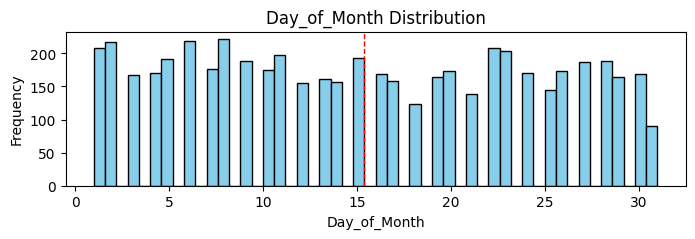

Column 'Week_of_Year Value' not found in DataFrame


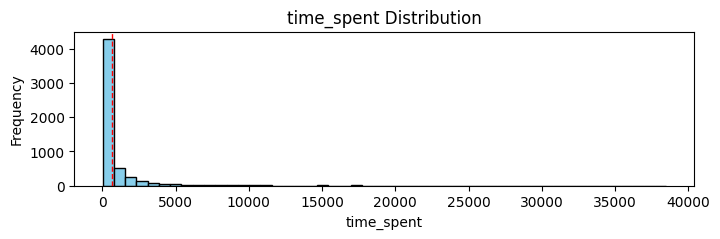

In [185]:
def plot_numerical_distributions(df, columns):
    """
    Plots the distributions of specified numerical columns in a DataFrame.
    
    """
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(8, 2))
            plt.hist(df[column].dropna(), bins=50, color='skyblue', edgecolor='black')
            plt.title(f'{column} Distribution')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1)
            plt.show()
        else:
            print(f"Column '{column}' not found in DataFrame")

columns_to_plot = ['Day_of_Month', 'Week_of_Year Value','time_spent']
plot_numerical_distributions(train, columns_to_plot)

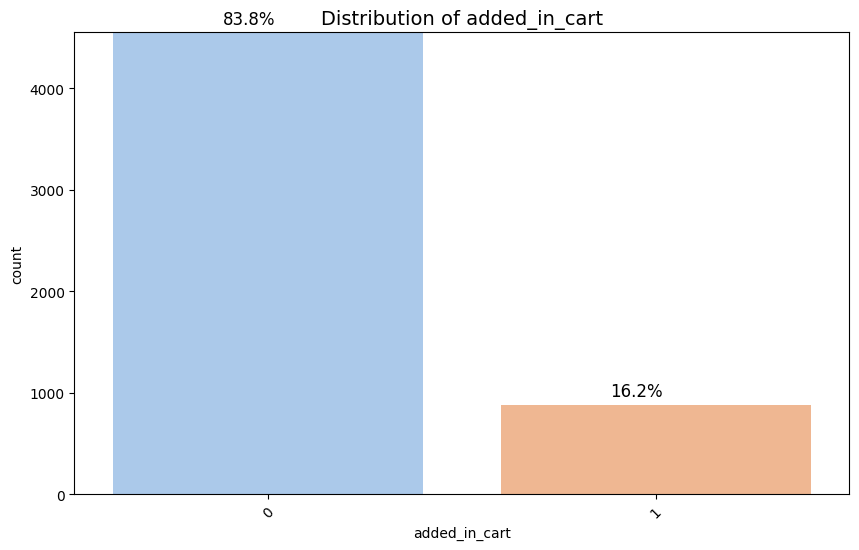

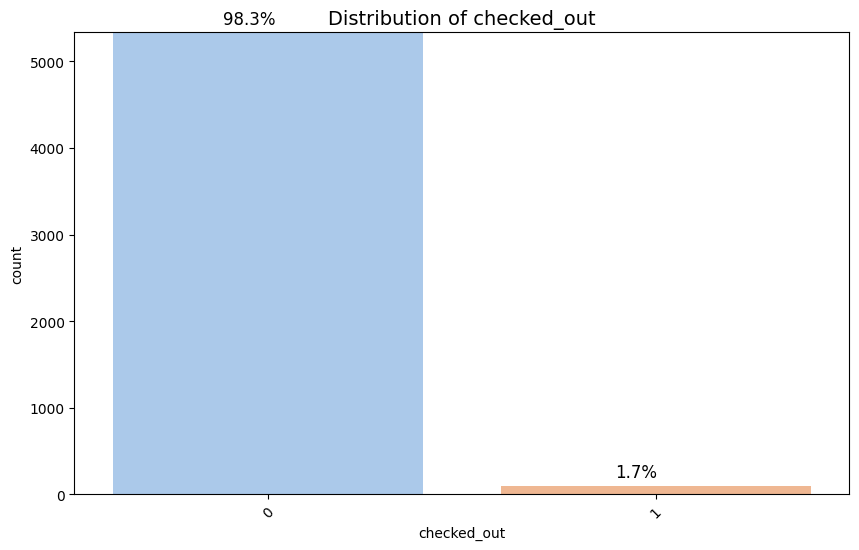

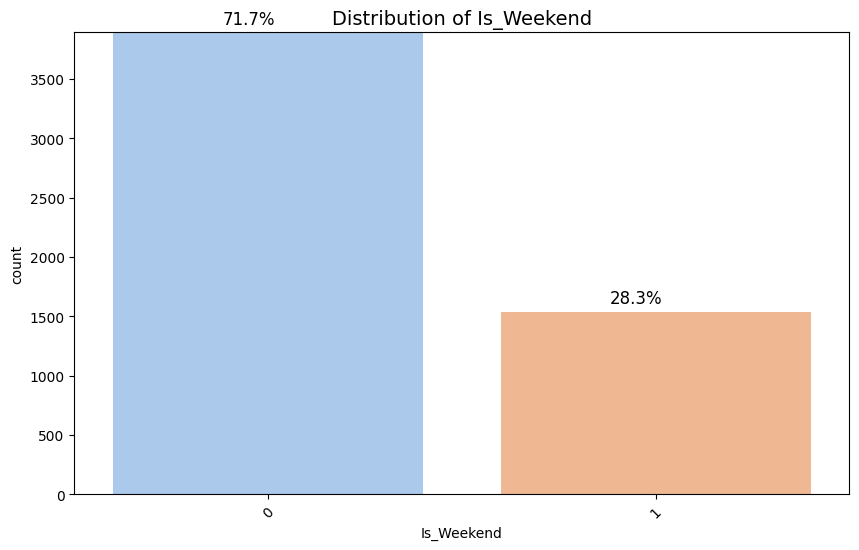

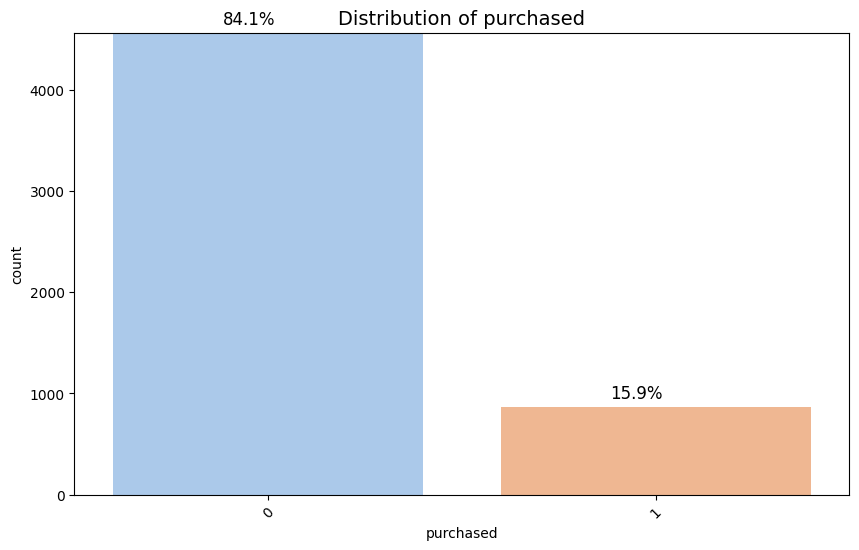

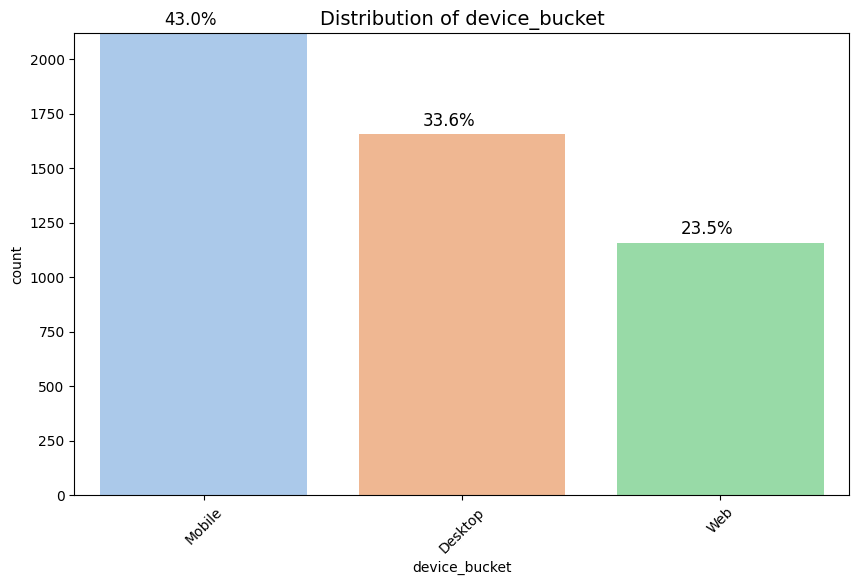

In [186]:
def plot_categorical_distributions(data, columns, top_n=10):
    """
    Plots the distributions of specified categorical columns, showing the top N categories.

    """
    for column in columns:
        # Get the top N categories
        top_categories = data[column].value_counts().nlargest(top_n).index
        top_data = data[data[column].isin(top_categories)]
        
        plt.figure(figsize=(10, 6))
        plt.title(f"Distribution of {column}", fontsize=14)
        plot = sns.countplot(x=column, data=top_data, palette='pastel', order=top_categories)
        plt.ylim(0, top_data[column].value_counts().max() + 1)
        
        total = len(top_data[column])
        for p in plot.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            plot.annotate(percentage, (x, y), size=12, ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        plt.xticks(rotation=45)
        plt.show()

cat_vars = ['added_in_cart','checked_out','Is_Weekend','purchased','device_bucket']
plot_categorical_distributions(train, cat_vars)

In [187]:
def preprocess_data(train_df, test_df):

    # Log transformation for skewed features
    train_df['time_spent'] = np.log1p(train_df['time_spent'])
    
    return train_df, test_df

train_df, test_df = preprocess_data(train, test)

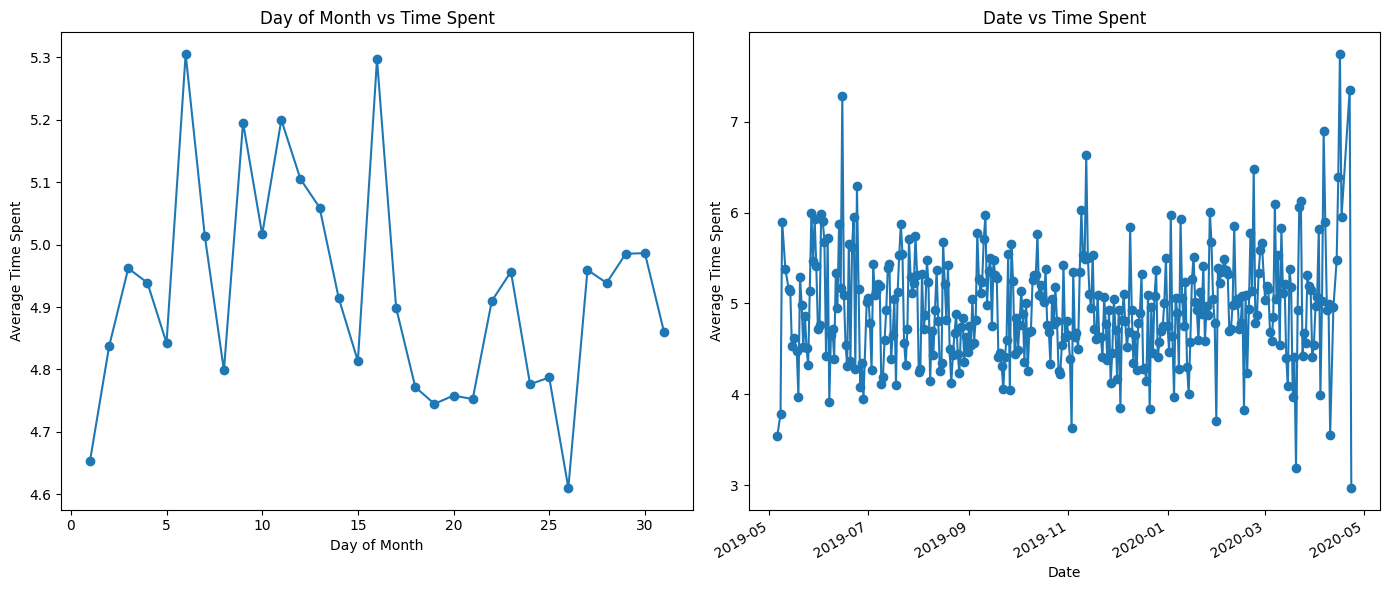

In [188]:
def plot_time_spent(df):
    """
    Plots a line graph of Day_of_Month vs. time_spent and a time series plot of date vs. time_spent.
    
    """
    
    # Plot Day_of_Month vs time_spent
    plt.figure(figsize=(14, 6))
    
    # Line graph of Day_of_Month vs time_spent
    plt.subplot(1, 2, 1)
    df.groupby('Day_of_Month')['time_spent'].mean().plot(kind='line', marker='o')
    plt.xlabel('Day of Month')
    plt.ylabel('Average Time Spent')
    plt.title('Day of Month vs Time Spent')

    # Time series plot of date vs time_spent
    plt.subplot(1, 2, 2)
    df.groupby('date')['time_spent'].mean().plot(kind='line', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Average Time Spent')
    plt.title('Date vs Time Spent')
    
    plt.tight_layout()
    plt.show()
    
plot_time_spent(train)

- Monthly Variation: User engagement fluctuates significantly within a month, with notable peaks and troughs.
- Increasing Trend: There is an overall increase in average time spent over the period analyzed, possibly due to growing user base or pandemic effects.
- High Activity Periods: Specific periods show high spikes in user activity, which could be leveraged for targeted marketing or promotions.

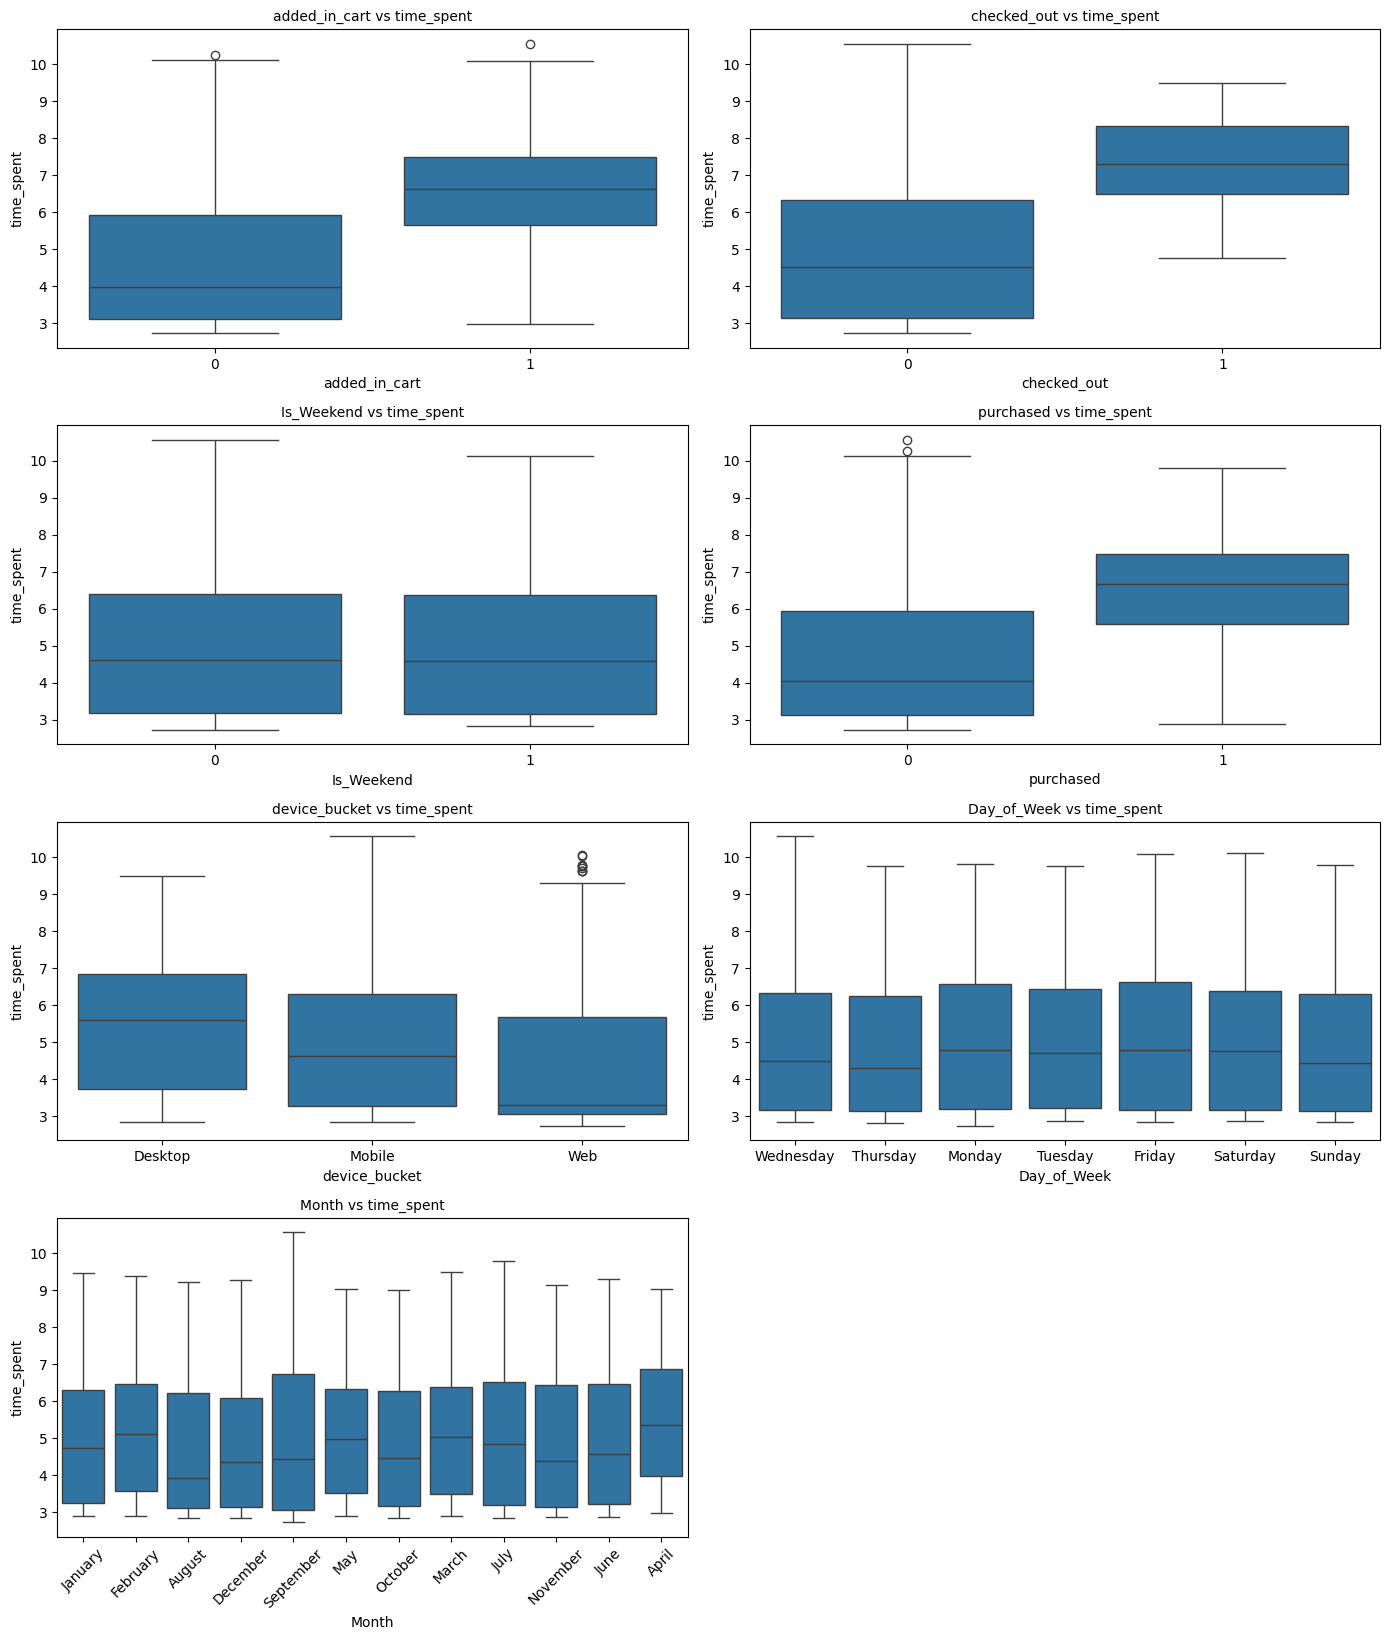

In [189]:
categorical_cols = ['added_in_cart','checked_out','Is_Weekend','purchased','device_bucket','Day_of_Week','Month']
num_plots = len(categorical_cols)
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

# Plot each categorical column against 'time_spent'
for i, col in enumerate(categorical_cols):
    sns.boxplot(data=train_df, x=col, y='time_spent', ax=axes[i])
    axes[i].set_title(f'{col} vs time_spent', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('time_spent')

# Remove any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

- Added to Cart: Users who add items to their cart tend to spend more time on the platform.
- Checked Out: Successful checkouts are associated with higher time spent.
- Purchased: Users who make purchases spend significantly more time compared to those who don't.
- Desktop vs. Mobile vs. Web: Desktop users tend to spend more time compared to mobile and web users. Mobile and web users have a similar distribution, but with some outliers in the web category.
- Day of the Week: There is a consistent pattern in time spent across different days of the week, with slight variations. Users spend relatively equal amounts of time on each day.
- Is_Weekend: There isn't a significant difference in the time spent by users on weekends compared to weekdays. Both distributions appear similar.
- Time Spent by Month: Month: There is some variation in time spent across different months, with certain months like June and January showing higher median time spent compared to others.

In [190]:
train_df = train_df.drop('date',axis=1)
test_df = test_df.drop('date',axis=1)

In [191]:
train_df.head()

,purchased,added_in_cart,checked_out,time_spent,Day_of_Week,Day_of_Month,Month,Week_of_Year,Is_Weekend,device_bucket
0,1,0,0,5.471792,Wednesday,22,January,4,0,Desktop
1,1,0,0,7.153408,Thursday,27,February,9,0,Mobile
2,0,0,0,3.122541,Thursday,1,August,31,0,Mobile
3,0,1,0,6.122934,Monday,30,December,1,0,Desktop
4,0,0,0,7.061229,Tuesday,10,September,37,0,Web


In [192]:
def calculate_predictive_power(df, target):
    """
    Calculates the predictive power score (PPS) for variables in a dataframe against a target variable.
    
    """
    predictors_df = pps.predictors(df, target)
    sorted_predictors = predictors_df.sort_values(by="ppscore", ascending=False)
    
    return sorted_predictors

predictors_df = calculate_predictive_power(train_df, "time_spent")
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,added_in_cart,time_spent,0.104286,regression,True,mean absolute error,1.538217,1.377803,DecisionTreeRegressor()
1,purchased,time_spent,0.098071,regression,True,mean absolute error,1.538217,1.387363,DecisionTreeRegressor()
2,device_bucket,time_spent,0.037407,regression,True,mean absolute error,1.544571,1.486793,DecisionTreeRegressor()
3,checked_out,time_spent,0.009646,regression,True,mean absolute error,1.538217,1.523379,DecisionTreeRegressor()
4,Day_of_Week,time_spent,0.000000,regression,True,mean absolute error,1.538217,1.552678,DecisionTreeRegressor()
5,Day_of_Month,time_spent,0.000000,regression,True,mean absolute error,1.538217,1.552330,DecisionTreeRegressor()
6,Month,time_spent,0.000000,regression,True,mean absolute error,1.538217,1.549911,DecisionTreeRegressor()
7,Week_of_Year,time_spent,0.000000,regression,True,mean absolute error,1.538217,1.553117,DecisionTreeRegressor()
8,Is_Weekend,time_spent,0.000000,regression,True,mean absolute error,1.538217,1.552936,DecisionTreeRegressor()


- Based on the insights and the predictive power score, the time periods features (Day_of_Week, Day_of_Month, Month, Week_of_Year, Is_Weeken) do not show significant impact on predicting user time spent on the platform, rather it's the featutes that are related to user activity (added_in_cart, purchased, device_bucket, checked_out) that show strong correlation and predictive power on how long a user will spend on the platfrom. So we can exclude the time period features from the model and only use the uer activity features.

In [193]:
train_df = train_df.drop(['Day_of_Week','Day_of_Month','Month','Week_of_Year','Is_Weekend'],axis=1)
test_df = test_df.drop(['Day_of_Week','Day_of_Month','Month','Week_of_Year','Is_Weekend'],axis=1)

In [194]:
# def label_encode_columns(df, columns):
#     """
#     Performs label encoding on specified columns in a DataFrame.

#     """
#     label_encoders = {}
#     for column in columns:
#         label_encoder = LabelEncoder()
#         df[column] = label_encoder.fit_transform(df[column])
#         label_encoders[column] = label_encoder
#     return df, label_encoders

# columns_to_encode = ['Day_of_Week','Month',]
# train_encoded, encoders = label_encode_columns(train_df, columns_to_encode)
# test_encoded, encoders = label_encode_columns(test_df, columns_to_encode)
# train_encoded.head()

In [195]:
def one_hot_encode_columns(df, columns):
    """
    Performs one-hot encoding on specified columns in a DataFrame.
    
    """
    df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)
    df_encoded = df_encoded.astype(int) 
    return df_encoded

columns_to_encode = ['device_bucket']
train_encoded = one_hot_encode_columns(train_df, columns_to_encode)
test_encoded = one_hot_encode_columns(test_df, columns_to_encode)
train_encoded.head()

,purchased,added_in_cart,checked_out,time_spent,device_bucket_Mobile,device_bucket_Web
0,1,0,0,5,0,0
1,1,0,0,7,1,0
2,0,0,0,3,1,0
3,0,1,0,6,0,0
4,0,0,0,7,0,1


In [196]:
def set_features_and_target(df):
    '''
    Returns two data frames with features and target variables.
            Parameters:
                    df (str): Pandas dataframe
    '''
    X = df.drop(['time_spent'], axis=1)
    y = df['time_spent']
    
    return X,y
                 
X,y = set_features_and_target(train_encoded)
print(X.shape, y.shape)

(5429, 5) (5429,)


In [197]:
def train_test_split_df(X,y):
    '''
    Creates train and test split.

    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_df(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3800, 5) (3800,)
(1629, 5) (1629,)


In [198]:
def model_application(X_train, y_train, optimiser):
    '''
    Model application. If optimiser is true, a grid search is applied to optimise the model. 
    If optimiser is false, the base model is used.

    '''
    if optimiser:
        # Define the parameters for grid search
        params = {
            'max_features': [1, 3, 10, 0.5],
            'min_samples_split': [2, 3, 10],
            'min_samples_leaf': [1, 3, 10],
            'criterion': ["squared_error", "absolute_error"]
        }

        # Using K-fold cross-validation
        cv = KFold(n_splits=5, shuffle=True, random_state=15)

        # Building the model
        rf = RandomForestRegressor()

        # Parameter estimation using GridSearch
        grid = GridSearchCV(rf, param_grid=params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, verbose=1)
        
        # Fitting the model
        grid.fit(X_train, y_train)

        best_score = grid.best_score_
        print('Best Score:', best_score)
        print('Best Params:', grid.best_params_)
        print('Best Estimator:', grid.best_estimator_)

        rf_reg = grid.best_estimator_
    else:
        rf_reg = RandomForestRegressor(n_estimators=150,
                                       max_depth=16,
                                       criterion='squared_error',
                                       min_samples_split=10,
                                       max_leaf_nodes=20,
                                       max_features=0.5,
                                       bootstrap=True)
        rf_reg.fit(X_train, y_train)

    return rf_reg

optimiser = False
rf_reg = model_application(X_train, y_train, optimiser)

In [199]:
def model_predict(rf, X_test):
    """
    Create y_pred, model prediction based on test set features.

    """
    y_pred = rf.predict(X_test)
    return y_pred

y_pred = model_predict(rf_reg, X_test)

# Print R-squared for training and test sets
print('Training R-squared Score (%):', rf_reg.score(X_train, y_train) * 100)
print('Test R-squared Score (%):', rf_reg.score(X_test, y_test) * 100)

# Print other regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred)) 
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Root Mean Squared Log Error:',rmsle)

Training R-squared Score (%): 31.40402925697334
Test R-squared Score (%): 30.268930060522216
Mean Squared Error: 2.10727895059457
Root Mean Squared Error: 1.4516469786399757
Root Mean Squared Log Error: 0.2587340775390995


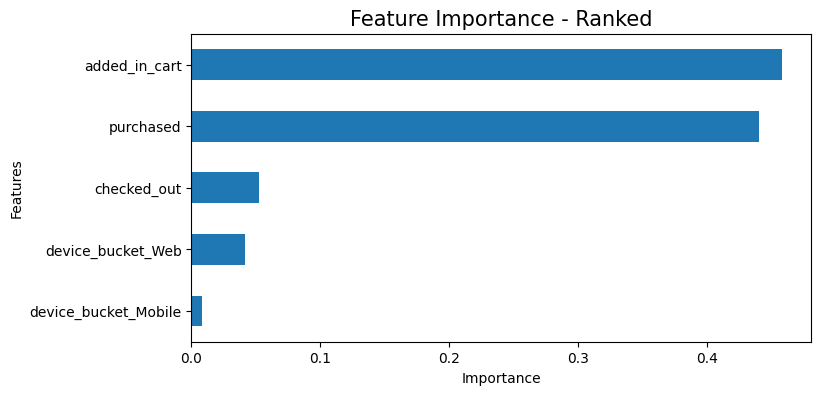

In [200]:
def plot_feature_importance(model, feature_names, n=30):
    
    '''
    Produces a plot displaying features that are most important predictors of the target feature.
            Parameters:
                    random forest model
                    feature names
    '''
    
    plt.figure(figsize=(8, 4))

    feat_importances = pd.Series(model.feature_importances_, index=feature_names)
    feat_importances.nsmallest(n).plot(kind='barh')
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title("Feature Importance - Ranked", fontsize=15)
    plt.show()

plot_feature_importance(rf_reg, X_train.columns)

In [201]:
#test_encoded = test_encoded.drop(['time_spent'],axis=1)

In [202]:
# Predict sale prices for test data
test_predictions_log = rf_reg.predict(test_encoded)

# Revert the log transformation
test_predictions = np.expm1(test_predictions_log)

# Segment properties based on gain
test_encoded['time_spent'] = test_predictions
test_encoded.head()

,purchased,added_in_cart,checked_out,device_bucket_Mobile,device_bucket_Web,time_spent
0,1,0,0,0,0,302.786274
1,0,0,0,1,0,56.461336
2,1,0,0,1,0,339.495470
3,0,0,0,0,0,50.993575
4,0,0,0,0,0,50.993575


In [203]:
test_encoded[['time_spent']].to_csv('/Users/mncedisimncwabe/Downloads/time_spent_predicted4.csv', index=False)
print("Submission file created successfully")

Submission file created successfully
